In [140]:
import numpy as np

#Generating random initial cofiguration:
unique=[]
i=0
while(i<8):
  pos = np.random.randint(low=0, high=64)
  if pos not in unique:
    unique.append(pos)
    i+=1
  else:
    continue

print(unique)
initial_state = np.zeros((8,8))
for x in unique:
  initial_state[x//8][x%8] = 1


[49, 19, 23, 51, 29, 10, 34, 5]


In [141]:
initial_state

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

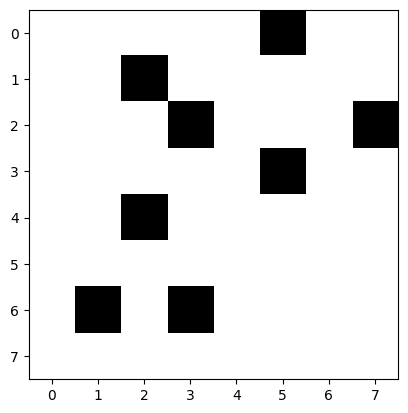

In [142]:
# def plot_state(state):
import matplotlib.pyplot as plt
plt.imshow(initial_state, cmap='binary', interpolation='nearest')

In [143]:
def initialize_weights():
    # Initialize an empty weight matrix
    weights = np.zeros((64, 64))

    # Set weights based on the energy function for Eight-rook problem
    for i in range(64):
        for j in range(64):
            # Set weights only for neighboring grid cells in the same row or column
            if i // 8 == j // 8 or i % 8 == j % 8:
                weights[i, j] = -2
    return weights

W = initialize_weights()

In [144]:
def energy(x):
  E1=0
  E2=0
  for j in range(8):
    sum=0
    for i in range(8):
      sum+=x[i][j]
    sum-=1
    E1+=sum**2

  for i in range(8):
    sum=0
    for j in range(8):
      sum+=x[i][j]
    sum-=1
    E2+=sum**2

  return E1+E2

In [145]:
energy(initial_state)

10.0

10.0


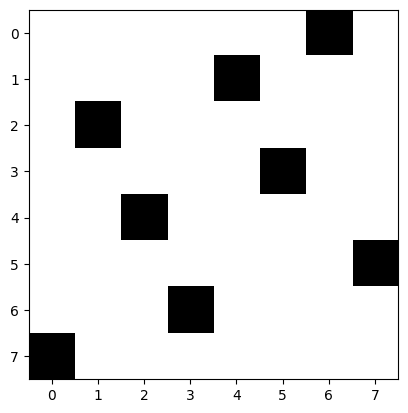

In [146]:


import numpy as np
import matplotlib.pyplot as plt

def flip(curr_energy, x):
    while True:
        pos1 = np.random.randint(low=0, high=64)
        pos2 = np.random.randint(low=0, high=64)
        if x[pos1 // 8][pos1 % 8] != 1 and x[pos2 // 8][pos2 % 8] != 0:
            continue
        if x[pos1 // 8][pos1 % 8] == 1 and x[pos2 // 8][pos2 % 8] == 0:
            x[pos1 // 8][pos1 % 8] = 0
            x[pos2 // 8][pos2 % 8] = 1
            new_energy = energy(x)
            if curr_energy > new_energy:  # Check if new energy is lower
                curr_energy = new_energy  # Update current energy
            else:  # Revert the changes if energy doesn't decrease
                x[pos1 // 8][pos1 % 8] = 1
                x[pos2 // 8][pos2 % 8] = 0
            break
    return curr_energy

# Assuming you have an initial_state and an energy function defined elsewhere
# initial_state = ...
# energy = ...

curr_energy = energy(initial_state)
print(curr_energy)
iterations = 1000
x = initial_state

for i in range(iterations):
    curr_energy = flip(curr_energy, x)
    # print(curr_energy)

plt.imshow(initial_state, cmap='binary', interpolation='nearest')
